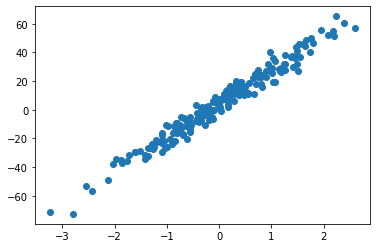

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=200, n_features=1,
                     bias=5.0,noise=5.0,random_state=123)

y = np.expand_dims(y,axis=1)

plt.scatter(X,y)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

In [4]:
model = keras.Sequential()
model.add(layers.Dense(1,activation='linear',input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


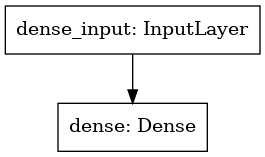

In [5]:
utils.plot_model(model)

In [18]:
optimizer = optimizers.SGD()
model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
history = model.fit(x_train,y_train,epochs=40)

Epoch 1/40
5/5 [==============================] - 0s 2ms/step - loss: 20.6142 - mae: 3.5836 - mse: 20.6142
Epoch 2/40
5/5 [==============================] - 0s 2ms/step - loss: 20.6297 - mae: 3.5867 - mse: 20.6297
Epoch 3/40
5/5 [==============================] - 0s 2ms/step - loss: 20.6201 - mae: 3.5842 - mse: 20.6201
Epoch 4/40
5/5 [==============================] - 0s 2ms/step - loss: 20.6123 - mae: 3.5834 - mse: 20.6123
Epoch 5/40
5/5 [==============================] - 0s 2ms/step - loss: 20.6128 - mae: 3.5831 - mse: 20.6128
Epoch 6/40
5/5 [==============================] - 0s 2ms/step - loss: 20.6106 - mae: 3.5827 - mse: 20.6106
Epoch 7/40
5/5 [==============================] - 0s 1ms/step - loss: 20.6161 - mae: 3.5825 - mse: 20.6161
Epoch 8/40
5/5 [==============================] - 0s 2ms/step - loss: 20.6266 - mae: 3.5830 - mse: 20.6266
Epoch 9/40
5/5 [==============================] - 0s 4ms/step - loss: 20.6242 - mae: 3.5835 - mse: 20.6242
Epoch 10/40
5/5 [====================

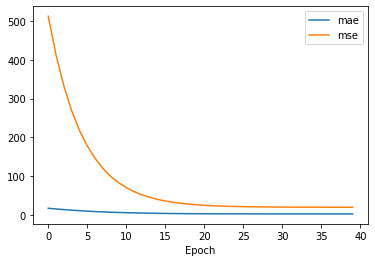

In [17]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show()

In [19]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 21.4854 - mae: 3.9510 - mse: 21.4854


[21.485355377197266, 3.950995683670044, 21.485355377197266]

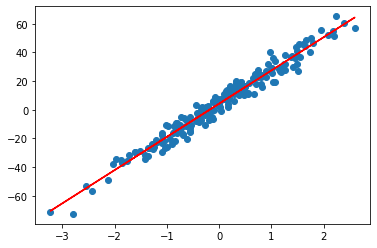

In [20]:
result = model.predict(X)

plt.scatter(X,y)
plt.plot(X,result,'r')
plt.show()

In [21]:
model.layers

In [23]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

dense
dense


In [24]:
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[23.151075]]
[4.2329564]


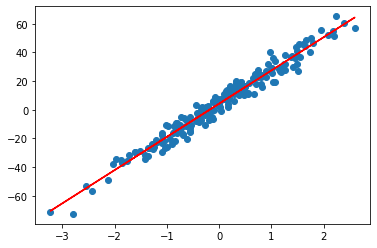

In [25]:
plt.scatter(X,y)
plt.plot(X,np.array(weights*X+biases),'r')
plt.show()